In [131]:
import os #  helps with file system operations (e.g., paths and directories).
import pandas as pd # helps with data manipulation
import matplotlib.pyplot as plt # helps with data visualization
import openpyxl # helps wit hsaving data to an Excel file 



# Set the working directory
os.chdir("/Users/allakhverdiagakishiev/Desktop/hw/coding/assignment")

# Display the current working directory
print(os.getcwd())

# Change the working directory to one level up
os.chdir("..")  # This changes the working directory to one level up

# Display the new working directory
print(os.getcwd())

# List the contents of the current directory
print(os.listdir())

# Checking if the file exists in the specified path
if os.path.exists('/Users/allakhverdiagakishiev/Desktop/hw/coding/assignment/osfstorage-archive/cs_bisnode_panel.csv'):
    print("File exists!")
else:
    print("File does not exist.")

/Users/allakhverdiagakishiev/Desktop/hw/coding/assignment
/Users/allakhverdiagakishiev/Desktop/hw/coding
['.DS_Store', 'assignment']
File exists!


In [132]:
# Import the CSV file
data = pd.read_csv('/Users/allakhverdiagakishiev/Desktop/hw/coding/assignment/osfstorage-archive/cs_bisnode_panel.csv')
# Browse the dataset(only first data row)
data.head(1)

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.59259,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN


In [133]:
# Keep only specific columns
data = data[['comp_id', 'curr_assets', 'ceo_count', 'region_m', 'founded_date', 'exit_date']]
# Rename the columns
data.rename(columns={
    'curr_assets': 'assets',
    'ceo_count': 'numb_CEOs',
    'region_m': 'region',
    'founded_date': 'founded',
    'exit_date': 'exit'
}, inplace=True)
# Display the data type of every column
print(data.dtypes)
# Browse the dataset(here it is 5 by defult)
data.head()

comp_id      float64
assets       float64
numb_CEOs    float64
region        object
founded       object
exit          object
dtype: object


,comp_id,assets,numb_CEOs,region,founded,exit
0,1001034.0,7266.666504,2.0,Central,1990-11-19,NaN
1,1001034.0,13122.222656,2.0,Central,1990-11-19,NaN
2,1001034.0,8196.295898,2.0,Central,1990-11-19,NaN
3,1001034.0,8485.185547,2.0,Central,1990-11-19,NaN
4,1001034.0,5137.037109,2.0,Central,1990-11-19,NaN


In [134]:
# List of columns to rename (excluding 'comp_id')
columns_to_rename = [col for col in data.columns if col != 'comp_id']

# Rename columns (excluding 'comp_id') with the prefix 'comp_'
data.rename(columns={col: f'comp_{col}' for col in columns_to_rename}, inplace=True)

# Browse the dataset to check whether variables changed in name (here I randomly picked a number of rows (3))
data.head(3)


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded,comp_exit
0,1001034.0,7266.666504,2.0,Central,1990-11-19,NaN
1,1001034.0,13122.222656,2.0,Central,1990-11-19,NaN
2,1001034.0,8196.295898,2.0,Central,1990-11-19,NaN


In [135]:
# Count Missing values ('NaN' and 'NA' values) before cleaning
missing_values = data.isna().sum() + (data == 'NA').sum()
print("\nMissing values per column:")
print(missing_values)

# Replace 'NA' with NaN and drop rows with missing or 'NA' values, except for 'comp_exit'
data = data.apply(lambda col: col.replace('NA', pd.NA) if col.dtype == 'object' else col)
data.dropna(subset=[col for col in data.columns if col != 'comp_exit'], inplace=True)

# Check for Missing values after cleaning
missing_values_after = data.isna().sum() + (data == 'NA').sum()
print("\nMissing values per column after cleaning:")
print(missing_values_after)



Missing values per column:
comp_id                0
comp_assets          131
comp_numb_CEOs     56427
comp_region          840
comp_founded          51
comp_exit         231649
dtype: int64

Missing values per column after cleaning:
comp_id                0
comp_assets            0
comp_numb_CEOs         0
comp_region            0
comp_founded           0
comp_exit         191909
dtype: int64


In [136]:
# Convert 'comp_assets' and 'comp_numb_CEOs' to numeric, coercing errors to NaN
data[['comp_assets', 'comp_numb_CEOs']] = data[['comp_assets', 'comp_numb_CEOs']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in 'comp_assets' and 'comp_numb_CEOs'
data.dropna(subset=['comp_assets', 'comp_numb_CEOs'], inplace=True)

# Display the first few rows
data.head()


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded,comp_exit
0,1001034.0,7266.666504,2.0,Central,1990-11-19,NaN
1,1001034.0,13122.222656,2.0,Central,1990-11-19,NaN
2,1001034.0,8196.295898,2.0,Central,1990-11-19,NaN
3,1001034.0,8485.185547,2.0,Central,1990-11-19,NaN
4,1001034.0,5137.037109,2.0,Central,1990-11-19,NaN


In [137]:
# List observations where 'comp_exit' is "NA"
na_comp_exit = data[data['comp_exit'] == "NA"]

# List observations where 'comp_exit' is missing
missing_comp_exit = data[data['comp_exit'].isna()]

# List observations where 'comp_exit' is an empty string
empty_comp_exit = data[data['comp_exit'] == ""]

# Concatenate all three DataFrames (observations with NA, missing, or empty strings)
combined_comp_exit = pd.concat([na_comp_exit, missing_comp_exit, empty_comp_exit])

# Print combined DataFrame
print(combined_comp_exit)

# Drop rows where 'comp_exit' is "NA", missing, or an empty string
data = data[~data['comp_exit'].isin(["NA", "", pd.NA])]

# Display the first few rows of the cleaned data
data.head()


             comp_id   comp_assets  comp_numb_CEOs comp_region comp_founded  \
0       1.001034e+06   7266.666504             2.0     Central   1990-11-19   
1       1.001034e+06  13122.222656             2.0     Central   1990-11-19   
2       1.001034e+06   8196.295898             2.0     Central   1990-11-19   
3       1.001034e+06   8485.185547             2.0     Central   1990-11-19   
4       1.001034e+06   5137.037109             2.0     Central   1990-11-19   
...              ...           ...             ...         ...          ...   
287823  4.641209e+11   1781.481445             1.0        East   1990-08-22   
287824  4.641209e+11   1807.407349             1.0        East   1990-08-22   
287825  4.641209e+11   1518.518555             1.0        East   1990-08-22   
287827  4.641209e+11    644.444458             1.0        East   1990-08-22   
287828  4.641209e+11    166.666672             1.0        East   1990-08-22   

       comp_exit  
0            NaN  
1            

,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded,comp_exit
0,1001034.0,7266.666504,2.0,Central,1990-11-19,NaN
1,1001034.0,13122.222656,2.0,Central,1990-11-19,NaN
2,1001034.0,8196.295898,2.0,Central,1990-11-19,NaN
3,1001034.0,8485.185547,2.0,Central,1990-11-19,NaN
4,1001034.0,5137.037109,2.0,Central,1990-11-19,NaN


In [138]:
# Drop the 'comp_exit' column as it's no longer needed
data.drop(columns=['comp_exit'], inplace=True)
data.head()


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded
0,1001034.0,7266.666504,2.0,Central,1990-11-19
1,1001034.0,13122.222656,2.0,Central,1990-11-19
2,1001034.0,8196.295898,2.0,Central,1990-11-19
3,1001034.0,8485.185547,2.0,Central,1990-11-19
4,1001034.0,5137.037109,2.0,Central,1990-11-19


In [139]:
# Extract the year and month from 'comp_founded'
data['year_founded'] = data['comp_founded'].str[:4].astype(int)
data['month_founded'] = data['comp_founded'].str[5:7].astype(int)
data.head()

,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded,year_founded,month_founded
0,1001034.0,7266.666504,2.0,Central,1990-11-19,1990,11
1,1001034.0,13122.222656,2.0,Central,1990-11-19,1990,11
2,1001034.0,8196.295898,2.0,Central,1990-11-19,1990,11
3,1001034.0,8485.185547,2.0,Central,1990-11-19,1990,11
4,1001034.0,5137.037109,2.0,Central,1990-11-19,1990,11


In [140]:
# Drop companies founded before 2000 or those founded in 2000 before May
data = data[(data['year_founded'] > 2000) | ((data['year_founded'] == 2000) & (data['month_founded'] > 5))]

# Drop the 'year_founded' and 'month_founded' columns
data.drop(columns=['year_founded', 'month_founded'], inplace=True)

# Display the first few rows
data.head()


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded
11,1001541.0,2040.740723,1.0,Central,2008-02-24
12,1001541.0,1740.740723,1.0,Central,2008-02-24
13,1001541.0,127403.703125,1.0,Central,2008-02-24
14,1001541.0,9629.629883,1.0,Central,2008-02-24
15,1001541.0,4811.111328,2.0,Central,2008-02-24


In [141]:
# Drop companies outside "Central" or "East" regions
data = data[data['comp_region'].isin(["Central", "East"])]

# Display the first 40 rows to verify the changes
data.head(40)


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded
11,1001541.0,2040.740723,1.0,Central,2008-02-24
12,1001541.0,1740.740723,1.0,Central,2008-02-24
13,1001541.0,127403.703125,1.0,Central,2008-02-24
14,1001541.0,9629.629883,1.0,Central,2008-02-24
15,1001541.0,4811.111328,2.0,Central,2008-02-24
16,1001541.0,6500.000000,2.0,Central,2008-02-24
17,1001541.0,8729.629883,2.0,Central,2008-02-24
18,1002029.0,138237.031250,2.0,East,2006-07-03
19,1002029.0,302511.125000,2.0,East,2006-07-03
20,1002029.0,401237.031250,2.0,East,2006-07-03


In [142]:
# Round 'comp_assets' to avoid decimals for easier analysis
data['comp_assets'] = data['comp_assets'].round()

# Display the first few rows to verify the changes
data.head()


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded
11,1001541.0,2041.0,1.0,Central,2008-02-24
12,1001541.0,1741.0,1.0,Central,2008-02-24
13,1001541.0,127404.0,1.0,Central,2008-02-24
14,1001541.0,9630.0,1.0,Central,2008-02-24
15,1001541.0,4811.0,2.0,Central,2008-02-24


In [143]:
# Calculate the mean of 'comp_assets'
mean_assets = data['comp_assets'].mean()

# Drop companies with assets below the mean
data = data[data['comp_assets'] >= mean_assets]

# Display the first few rows to verify the changes
data.head()


,comp_id,comp_assets,comp_numb_CEOs,comp_region,comp_founded
19,1002029.0,302511.0,2.0,East,2006-07-03
20,1002029.0,401237.0,2.0,East,2006-07-03
21,1002029.0,230781.0,2.0,East,2006-07-03
22,1002029.0,779396.0,2.0,East,2006-07-03
23,1002029.0,203885.0,2.0,East,2006-07-03


In [144]:
# Convert 'comp_founded' to a date variable
data['date_founded'] = pd.to_datetime(data['comp_founded'], format='%Y-%m-%d')

# Drop the original 'comp_founded' variable
data.drop(columns=['comp_founded'], inplace=True)

# Sort by 'comp_id' and 'date_founded', then create a tag to represent the order of events within each company
data['tag'] = data.groupby('comp_id')['date_founded'].rank(method='first')

# Create 'total_assets' and 'total_CEO' by summing over each company
data['total_assets'] = data.groupby('comp_id')['comp_assets'].transform('sum')
data['total_CEO'] = data.groupby('comp_id')['comp_numb_CEOs'].transform('sum')

# Count facilities in the "Central" and "East" regions 
data['Central_facilities'] = (data['comp_region'] == 'Central').astype(int)
data['Eastern_facilities'] = (data['comp_region'] == 'East').astype(int)

# Group by 'comp_id' and aggregate the facility counts for each company
data['Central_facilities'] = data.groupby('comp_id')['Central_facilities'].transform('sum')
data['Eastern_facilities'] = data.groupby('comp_id')['Eastern_facilities'].transform('sum')

# Keep only the first row for each company (remove duplicates)
data = data[data['tag'] == 1]

# Drop unnecessary columns after aggregation
data.drop(columns=['tag', 'comp_assets', 'comp_numb_CEOs'], inplace=True)

# Create the total number of facilities
data['total_facilities'] = data['Central_facilities'] + data['Eastern_facilities']

# Display the first few rows to verify the changes
data.head()


,comp_id,comp_region,date_founded,total_assets,total_CEO,Central_facilities,Eastern_facilities,total_facilities
19,1002029.0,East,2006-07-03,2789977.0,14.0,0,9,9
66,1014183.0,Central,2001-12-21,1162596.0,8.0,6,0,6
400,1988363.0,Central,2003-11-19,822989.0,4.0,4,0,4
670,3372747.0,Central,2003-06-17,169526.0,1.0,1,0,1
1196,9101233.0,Central,2009-02-09,178467.0,2.0,1,0,1


In [145]:
# Display detailed summary for specific columns (equivalent to Stata's summarize total_assets total_CEO, detail)
print(data[['total_assets', 'total_CEO']].describe())
# Generate a table of summary statistics (mean, sd) for specific columns
summary_stats = data[['total_assets', 'total_CEO', 'total_facilities']].agg(['mean', 'std'])
print(summary_stats)

       total_assets    total_CEO
count  2.334000e+03  2334.000000
mean   6.502330e+06     5.194087
std    7.437886e+07     5.677845
min    1.442480e+05     1.000000
25%    3.041468e+05     2.000000
50%    7.705110e+05     3.000000
75%    2.318500e+06     7.000000
max    3.442363e+09    52.000000
      total_assets  total_CEO  total_facilities
mean  6.502330e+06   5.194087          3.582262
std   7.437886e+07   5.677845          2.803441


In [146]:
# Frequency table for 'comp_region'
print(data['comp_region'].value_counts())

# Display companies in the 'Central' region
print(data[data['comp_region'] == 'Central'][['comp_id', 'total_assets']])

# Display companies in the 'East' region
print(data[data['comp_region'] == 'East'][['comp_id', 'total_assets']])


comp_region
Central    1760
East        574
Name: count, dtype: int64
             comp_id  total_assets
66      1.014183e+06     1162596.0
400     1.988363e+06      822989.0
670     3.372747e+06      169526.0
1196    9.101233e+06      178467.0
1649    1.684924e+07     1448382.0
...              ...           ...
286868  4.608794e+11      186841.0
287219  4.621102e+11      160267.0
287246  4.621988e+11      156841.0
287427  4.627707e+11      332192.0
287795  4.640446e+11    42266812.0

[1760 rows x 2 columns]
             comp_id  total_assets
19      1.002029e+06     2789977.0
1260    9.755598e+06      832448.0
2537    3.661622e+07     3625814.0
2900    4.702892e+07      541346.0
3088    5.187153e+07     6214123.0
...              ...           ...
282809  4.479728e+11     3556395.0
285162  4.555038e+11      428000.0
285304  4.560368e+11    44957810.0
285947  4.580950e+11    21131222.0
286222  4.591402e+11      550696.0

[574 rows x 2 columns]


In [147]:
# Create a binary 'ceo_bin' variable based on 'total_CEO'
data['ceo_bin'] = pd.cut(data['total_CEO'], bins=[-float('inf'), 5, 15, float('inf')], labels=[1, 2, 3])

# Display the 'total_assets' by 'ceo_bin' statistics with 'observed=False'
print(data.groupby('ceo_bin', observed=False)['total_assets'].agg(['mean', 'max', 'min']))

# Display general summary of 'total_assets'
print(data['total_assets'].agg(['mean', 'max', 'min']))


                 mean           max        min
ceo_bin                                       
1        1.385072e+06  2.678431e+08   144248.0
2        1.532862e+07  3.442363e+09   296737.0
3        2.780962e+07  3.098990e+08  1269840.0
mean    6.502330e+06
max     3.442363e+09
min     1.442480e+05
Name: total_assets, dtype: float64


In [148]:
# Create the 'assets_thousands' variable
data['assets_thousands'] = data['total_assets'] / 1000

# Drop the original 'total_assets' variable
data.drop(columns=['total_assets'], inplace=True)

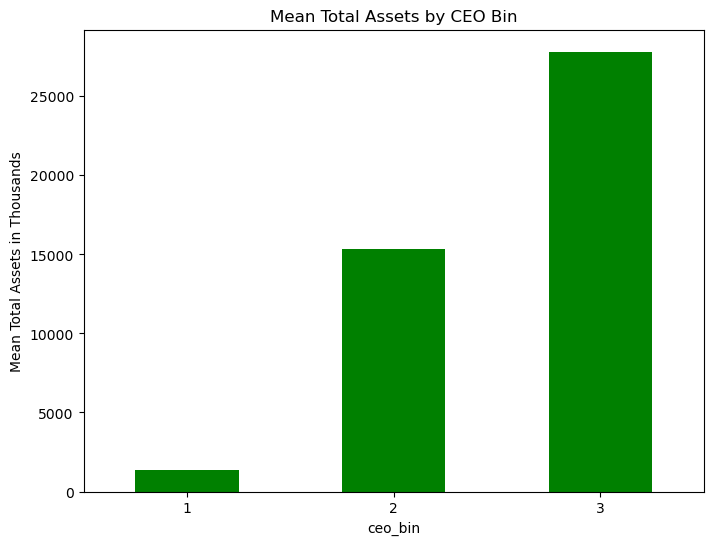

In [149]:
# Create a bar graph of mean assets by 'ceo_bin'
plt.figure(figsize=(8, 6))
data.groupby('ceo_bin', observed=False)['assets_thousands'].mean().plot(kind='bar', color='green')
plt.title('Mean Total Assets by CEO Bin')
plt.ylabel('Mean Total Assets in Thousands')
plt.xticks(rotation=0)
plt.show()


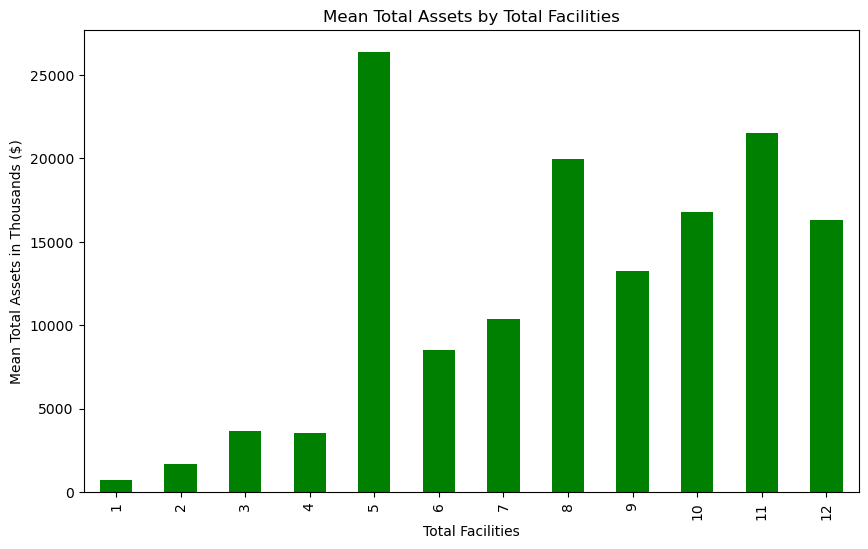

In [150]:
# Bar graph of mean assets by 'total_facilities'
plt.figure(figsize=(10, 6))
data.groupby('total_facilities')['assets_thousands'].mean().plot(kind='bar', color='green')
plt.title('Mean Total Assets by Total Facilities')
plt.ylabel('Mean Total Assets in Thousands ($)')
plt.xlabel('Total Facilities')
plt.show()

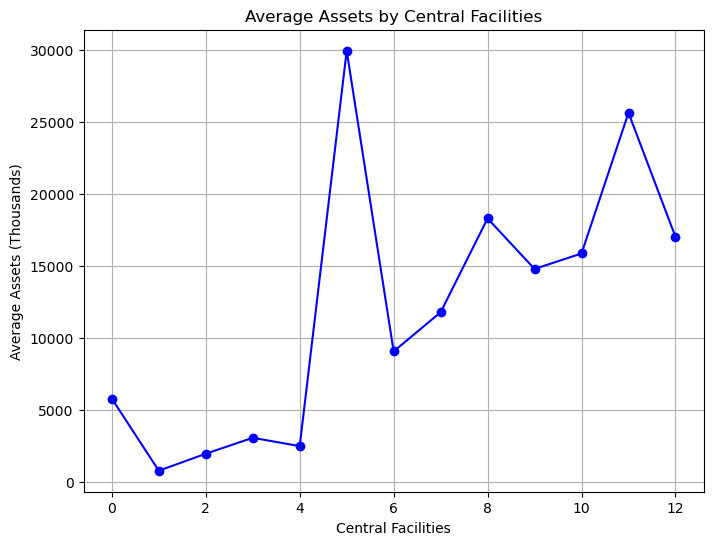

In [151]:
# Create a line graph of average assets by Central facilities
data_grouped_central = data.groupby('Central_facilities')['assets_thousands'].mean()
plt.figure(figsize=(8, 6))
plt.plot(data_grouped_central.index, data_grouped_central.values, marker='o', color='blue')
plt.title('Average Assets by Central Facilities')
plt.xlabel('Central Facilities')
plt.ylabel('Average Assets (Thousands)')
plt.grid(True)
plt.show()

In [152]:
# Save the dataset as an Excel file
data.to_excel("/Users/allakhverdiagakishiev/Desktop/hw/coding/assignment/finale/Codin_Python.xlsx", index=False)
